<table align="left" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21618C" size=5px>
                  <b>DETECTING EARLY ALZHEIMER'S USING MRI DATA AND MACHINE LEARNING
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement



**-** Alzheimer's disease (AD) is a neurodegenerative disorder of uncertain cause and pathogenesis that primarily affects older adults and is the most common cause of dementia.

**-** The earliest clinical manifestation of AD is selective memory impairment and while treatments are available to ameliorate some symptoms, there is no cure currently available.

**-** Brain Imaging via magnetic resonance imaging (MRI), is used for evaluation of patients with suspected AD.

**-** MRI findings include both, local and generalized shrinkage of brain tissue.

**-** Some studies have suggested that MRI features may predict rate of decline of AD and may guide therapy in the future.

**-** However in order to reach that stage clinicians and researchers will have to make use of machine learning techniques that can accurately predict progress of a patient from mild cognitive impairment to dementia.

**-** We propose to develop a sound model that can help clinicians do that and predict early alzheimer's.

##  DATASET DESCRIPTION



**-** We will be using the longitudinal MRI data.

**-** The dataset consists of a longitudinal MRI data of 150 subjects aged 60 to 96.

**-** Each subject was scanned at least once.

**-** Everyone is right-handed.

**-** 72 of the subjects were grouped as 'Nondemented' throughout the study.

**-** 64 of the subjects were grouped as 'Demented' at the time of their initial visits and remained so throughout the study.

**-** 14 subjects were grouped as 'Nondemented' at the time of their initial visit and were subsequently characterized as 'Demented' at a later visit. These fall under the 'Converted' category.

##  COLUMN DESCRIPTORS

**EDUC**    -  Years of education

**SES**     -	Socioeconomic Status

**MMSE** -	Mini Mental State Examination

**CDR**  -	Clinical Dementia Rating

**eTIV** -	Estimated Total Intracranial Volume

**nWBV** -	Normalize Whole Brain Volume

**ASF**  -	Atlas Scaling Factor

## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#RD)**
4. **[Data Analysis and Preparation](#data_preparation)**
5. **[Logistic Regression](#LogisticReg)**
    - 5.1 - [Logistic Regression (MLE with Scaled Features)](#withScaledFeatures)
    - 5.2 - [Logistic Regression (using SGD)](#usingSGD)
6. **[Decision Tree](#DecisionTree)**
    - 6.1 - [Decision Tree](#DecisionTreeWFS)
    - 6.2 - [Prune a Decision Tree](#DecisionTreePruning)
    - 6.3 - [Decision Tree (using GridSearchCV)](#DecisionTreewithGridSearchCv)

7. **[Support Vector Machine (using GridSearchCV and Regularization)](#SVM)**
9. **[Conclusion and Interpretation](#conclusion)**

<a id='import_lib'></a>
## 1. Import Libraries

In [1]:
!pip install scikit-learn --upgrade
!pip install scipy --upgrade
!pip install sklearn --upgrade

     |████████████████████████████████| 27.4 MB 4.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.0 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.15.6 which is incompatible.
autogluon-core 0.1.0 requires scipy==1.5.4, but you have scipy 1.6.2 which is incompatible.


In [2]:
!pip install scikit-learn==0.22.2

     |████████████████████████████████| 7.1 MB 4.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-pandas 2.1.0 requires scikit-learn>=0.23.0, but you have scikit-learn 0.22.2 which is incompatible.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.0 which is incompatible.
imbalanced-learn 0.8.0 requires scikit-learn>=0.24, but you have scikit-learn 0.22.2 which is incompatible.
autogluon-core 0.1.0 requires scipy==1.5.4, but you have scipy 1.6.2 which is incompatible.


In [3]:

import warnings
warnings.filterwarnings("ignore")


import os

import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO  
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import export_graphviz

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pydotplus
from IPython.display import Image  
import graphviz



ModuleNotFoundError: No module named 'pydotplus'

<a id='set_options'></a>
## 2. Set Options

In [4]:
pd.options.display.max_columns = None

pd.options.display.max_rows = None

np.set_printoptions(suppress=True)

<a id='RD'></a>
## 3. Read Data

In [5]:
df=pd.read_csv('../input/mri-and-alzheimers/oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


<a id='data_preparation'></a>
## 4. Data Analysis and Preparation

In [6]:
df.shape

(373, 15)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We see that there are 373 observations and 12 features </br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




In [7]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [8]:
df.describe(include='object')

,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0070,OAS2_0070_MR5,Nondemented,F,R
freq,5,1,190,213,373


In [9]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [10]:
df.head()

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,0,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,1,0,1,71,16,NaN,28.0,0.5,1357,0.748,1.293


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        - we have changed the values of Gender to 0,1<br>
                        - we have changed the targer value to 0,1<br>
                        - we have dropped the MRI ID,Visit,Hand columns<br>    
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='M/F', ylabel='count'>

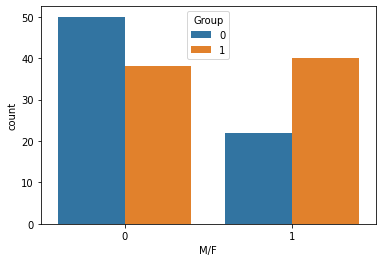

In [11]:
sns.countplot(df['M/F'],hue=df['Group'])

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The above graph indicates that men are more likely with dementia than women<br>   
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
col=['EDUC','MMSE','eTIV','nWBV','ASF'] #SES CDR categorical 

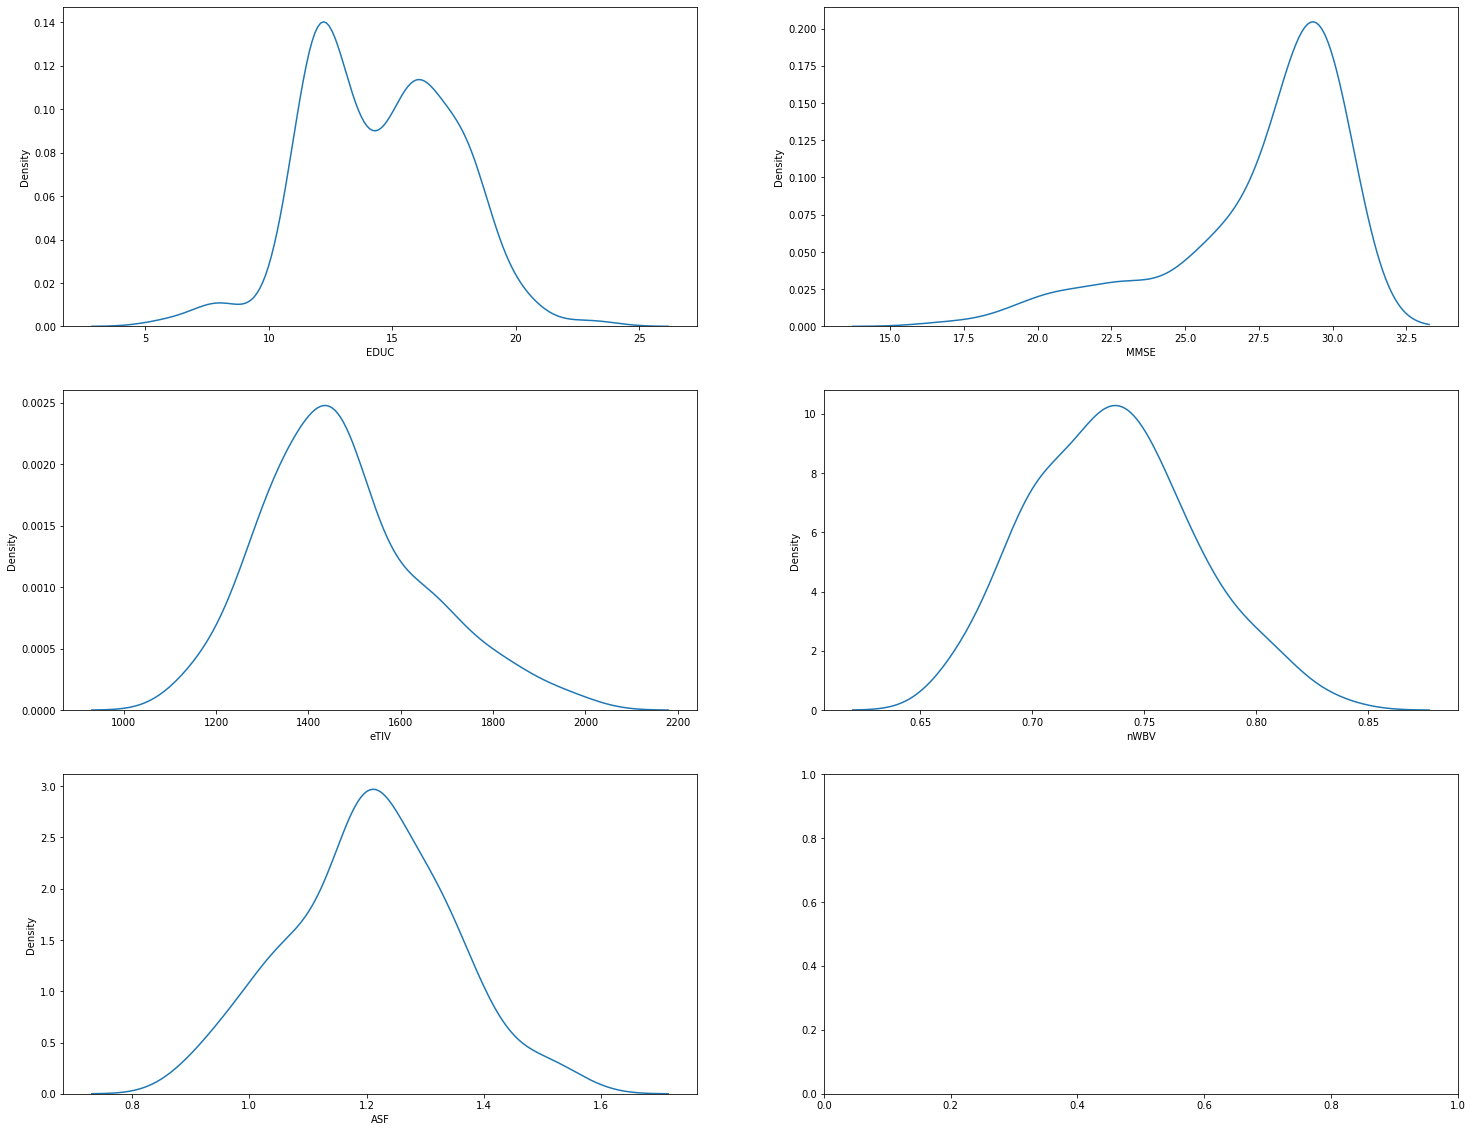

In [13]:
plt.rcParams['figure.figsize']=(15,10)

# plot the histogram of numeric variables
# Note: the hist() function considers the numeric variables only, by default
fig, ax = plt.subplots(3,2, figsize=(25, 20))
for i, subplot in zip(col, ax.flatten()):
    sns.kdeplot(df[i],ax=subplot)

(15.3, 30.0)

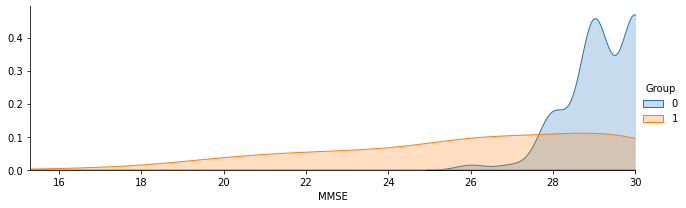

In [14]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)
    

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The chart shows Nondemented group got much more higher MMSE scores than Demented group.<br>
                        </b
                </font>
            </div>
        </td>
    </tr>
</table>

(0.6, 0.9)

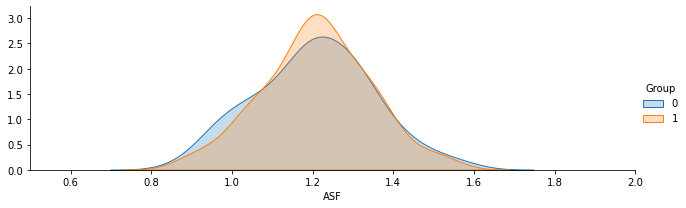

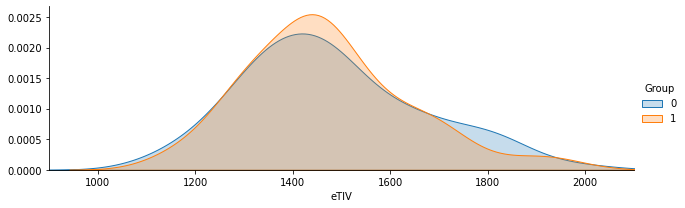

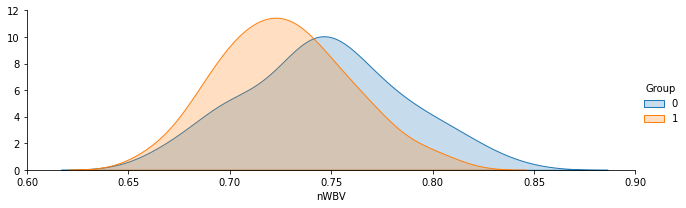

In [15]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The chart indicates that Nondemented group has higher brain volume ratio than Demented group. This is assumed to be because the diseases affect the brain to be shrinking its tissue.<br>   
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

(50.0, 100.0)

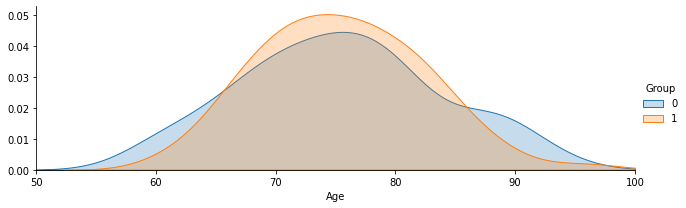

In [16]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                       There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.<br>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='Group', ylabel='MMSE'>

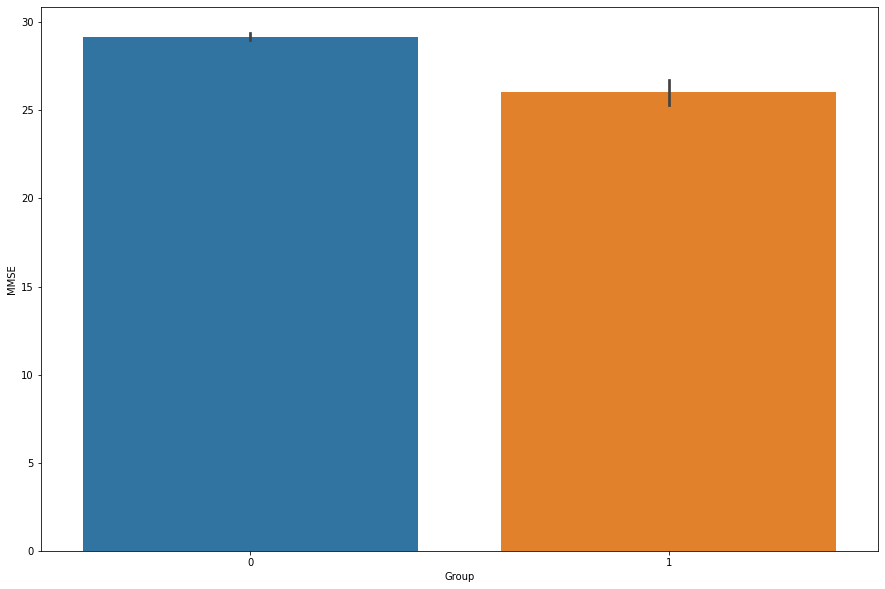

In [17]:
sns.barplot(y=df.MMSE, x=df.Group)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above graph, demented patients have less MMSE and Non Demented patients have more MMSE value.Generally the MMSE  indicates value  less than  24 indicates Abnormality, which implies the observations are true as the MMSE Metrics   <br>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Text(0.5, 1.0, '% of Group')

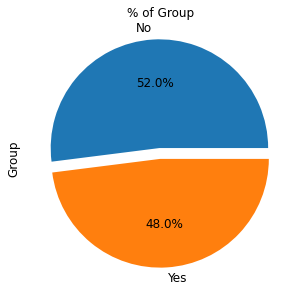

In [18]:
ax = (df['Group'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12,explode=(0.1,0))
ax.set_ylabel('Group',fontsize = 12)
ax.set_title('% of Group', fontsize = 12)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The above graph indicates that almost half of the patients, visiting for the first time are detected with Alzhimers<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

(0.0, 0.16)

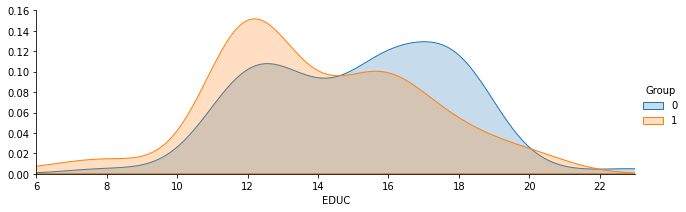

In [19]:
#'EDUC' = Years of Education
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        <h>--- Intermediate Result Summary</h><br>
- Men are more likely with demented, an Alzheimer's Disease, than Women.<br>
- Demented patients were less educated in terms of years of education.<br>
- Nondemented group has higher brain volume than Demented group.<br>
- Higher concentration of 70-80 years old in Demented group than those in the nondemented patients.<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
df.isnull().sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        There are some null values in SES<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [22]:
df.isnull().sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [23]:
df['Group'].value_counts()

1    78
0    72
Name: Group, dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The data is well Balanced<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
df=df.drop('MR Delay',axis=1)

In [25]:
corr = df.corr()
corr

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,0.210282,0.002058,-0.212378,0.084437,-0.530773,0.768221,-0.031369,-0.265774,0.021365
M/F,0.210282,1.000000,-0.062457,0.070563,-0.034792,-0.218365,0.203178,0.571898,-0.241635,-0.564241
Age,0.002058,-0.062457,1.000000,-0.065513,-0.012407,-0.022629,-0.039313,-0.009693,-0.558027,0.020708
EDUC,-0.212378,0.070563,-0.065513,1.000000,-0.727861,0.216439,-0.227556,0.236263,0.048484,-0.218819
SES,0.084437,-0.034792,-0.012407,-0.727861,1.000000,-0.186673,0.148746,-0.235439,0.022244,0.226172
MMSE,-0.530773,-0.218365,-0.022629,0.216439,-0.186673,1.000000,-0.691874,-0.051549,0.322025,0.059661
CDR,0.768221,0.203178,-0.039313,-0.227556,0.148746,-0.691874,1.000000,0.037608,-0.310813,-0.039840
eTIV,-0.031369,0.571898,-0.009693,0.236263,-0.235439,-0.051549,0.037608,1.000000,-0.195254,-0.988228
nWBV,-0.265774,-0.241635,-0.558027,0.048484,0.022244,0.322025,-0.310813,-0.195254,1.000000,0.190626
ASF,0.021365,-0.564241,0.020708,-0.218819,0.226172,0.059661,-0.039840,-0.988228,0.190626,1.000000


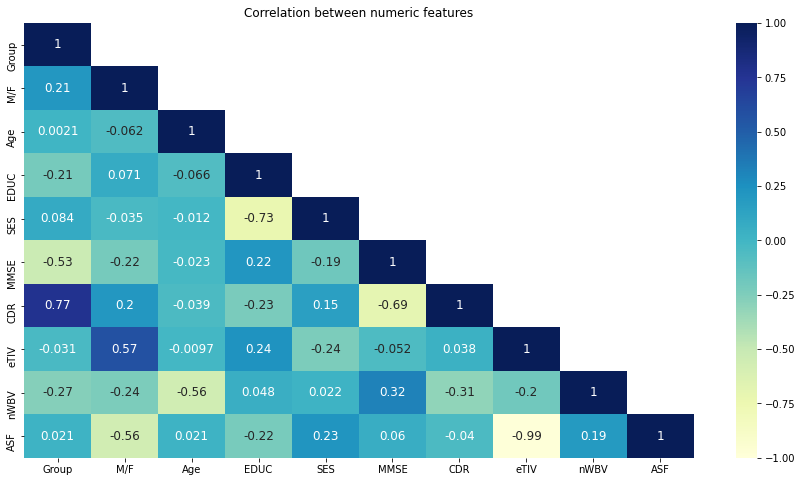

In [26]:
# set the figure size
plt.figure(figsize=(15, 8))

# use 'mask' to plot a diagonal correlation matrix 
# 'triu_indices_from' returns the indices for the upper-triangle of matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k = 1)] = True

# plotting the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: Sets the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 12}, mask=mask)

# specify name of the plot
plt.title('Correlation between numeric features')
plt.show()

In [27]:
df.columns

Index(['Subject ID', 'Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR',
       'eTIV', 'nWBV', 'ASF'],
      dtype='object')

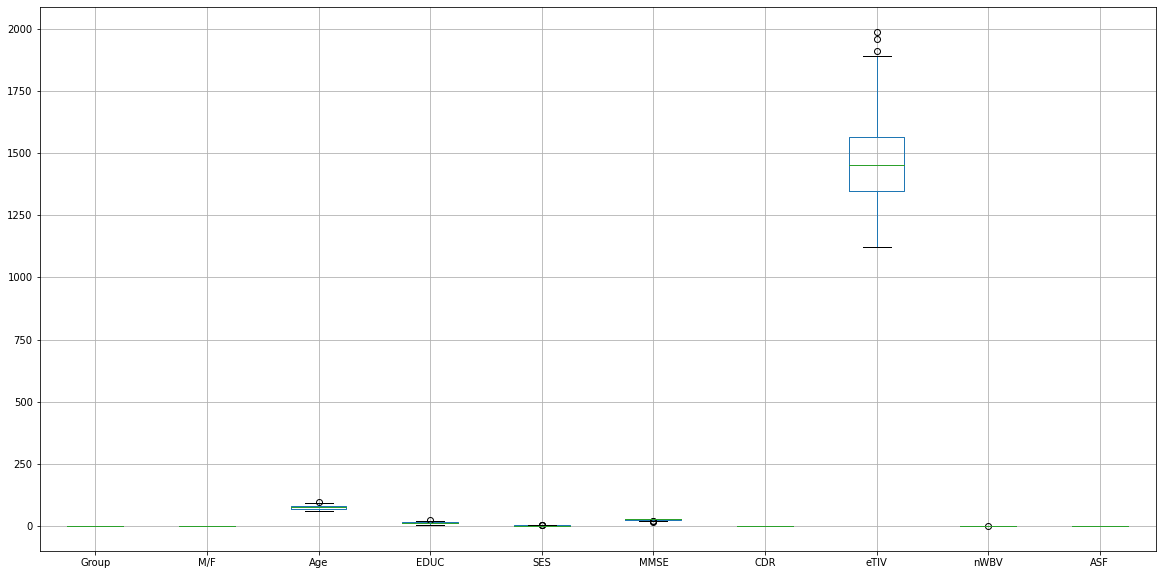

In [28]:
plt.rcParams['figure.figsize']=(20,10)

# plot multiple boxplots
df.boxplot()
plt.show()

In [29]:
df.head()

,Subject ID,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,1,1,75,12,3.0,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,1,1,71,16,2.0,28.0,0.5,1357,0.748,1.293


In [30]:
df= pd.get_dummies(df, columns = ['SES','CDR'], drop_first = True)

In [31]:
df.head()

,Subject ID,Group,M/F,Age,EDUC,MMSE,eTIV,nWBV,ASF,SES_2.0,SES_3.0,SES_4.0,SES_5.0,CDR_0.5,CDR_1.0
0,OAS2_0001,0,1,87,14,27.0,1987,0.696,0.883,1,0,0,0,0,0
1,OAS2_0002,1,1,75,12,23.0,1678,0.736,1.046,0,1,0,0,1,0
2,OAS2_0004,0,0,88,18,28.0,1215,0.710,1.444,0,1,0,0,0,0
3,OAS2_0005,0,1,80,12,28.0,1689,0.712,1.039,0,0,1,0,0,0
4,OAS2_0007,1,1,71,16,28.0,1357,0.748,1.293,1,0,0,0,1,0


In [32]:
X=df.drop('Group',axis=1)


In [33]:
X.head()

,Subject ID,M/F,Age,EDUC,MMSE,eTIV,nWBV,ASF,SES_2.0,SES_3.0,SES_4.0,SES_5.0,CDR_0.5,CDR_1.0
0,OAS2_0001,1,87,14,27.0,1987,0.696,0.883,1,0,0,0,0,0
1,OAS2_0002,1,75,12,23.0,1678,0.736,1.046,0,1,0,0,1,0
2,OAS2_0004,0,88,18,28.0,1215,0.710,1.444,0,1,0,0,0,0
3,OAS2_0005,1,80,12,28.0,1689,0.712,1.039,0,0,1,0,0,0
4,OAS2_0007,1,71,16,28.0,1357,0.748,1.293,1,0,0,0,1,0


In [34]:
y=df['Group']

<a id='LogisticReg'></a>
## 5. Logistic Regression 

<a id='withScaledFeatures'></a>
### 5.1 Logistic Regression (MLE with Scaled Features)

In [35]:
X=X.drop('Subject ID',axis=1)

In [36]:
X.head()

,M/F,Age,EDUC,MMSE,eTIV,nWBV,ASF,SES_2.0,SES_3.0,SES_4.0,SES_5.0,CDR_0.5,CDR_1.0
0,1,87,14,27.0,1987,0.696,0.883,1,0,0,0,0,0
1,1,75,12,23.0,1678,0.736,1.046,0,1,0,0,1,0
2,0,88,18,28.0,1215,0.710,1.444,0,1,0,0,0,0
3,1,80,12,28.0,1689,0.712,1.039,0,0,1,0,0,0
4,1,71,16,28.0,1357,0.748,1.293,1,0,0,0,1,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# print dimensions of train and test sets
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (105, 13)
X_test (45, 13)
y_train (105,)
y_test (45,)


In [38]:
sc = StandardScaler()

# scaling the train set
X_train_scaled = sc.fit_transform(X_train)

# scaling the test set
X_test_scaled = sc.fit_transform(X_test)

In [39]:
logreg_scaled_features = LogisticRegression()

# fit the logistic regression function
logreg_scaled_features.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = logreg_scaled_features.predict(X_test_scaled)

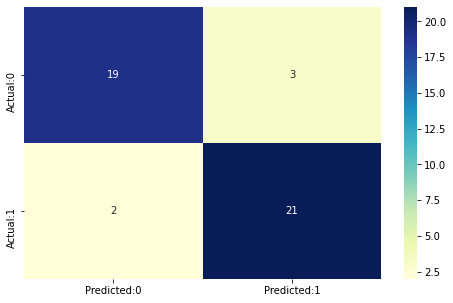

In [41]:
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [42]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [43]:
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.88      0.91      0.89        23

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



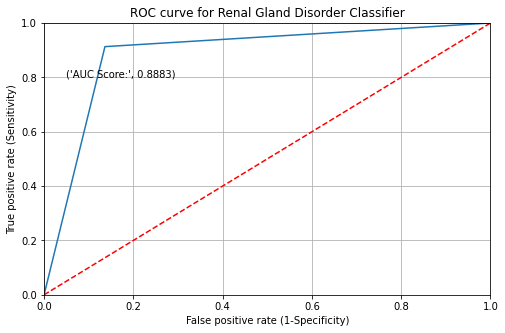

In [44]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes
plt.title('ROC curve for Renal Gland Disorder Classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [45]:
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)
Logistic_regression_ScaledFeatures_metrics = pd.Series({'Model': "Logistic regression (ScaledFeatures) ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score': metrics.f1_score(y_test, y_pred)})


# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_ScaledFeatures_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression (ScaledFeatures),0.88834,0.875,0.913043,0.888889,0.893617


### 5.2 Logistic Regression (MLE without Scaled Features)

In [46]:
logreg_scaled_features = LogisticRegression()

# fit the logistic regression function
logreg_scaled_features.fit(X_train,y_train)

AttributeError: 'str' object has no attribute 'decode'

In [47]:
y_pred = logreg_scaled_features.predict(X_test)

AttributeError: 'list' object has no attribute 'shape'

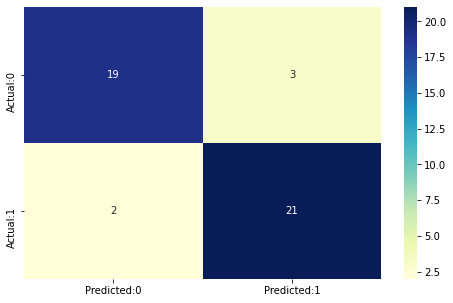

In [48]:
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [49]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [50]:
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.88      0.91      0.89        23

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



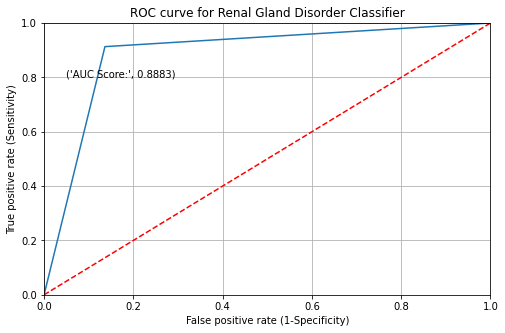

In [51]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes
plt.title('ROC curve for Renal Gland Disorder Classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [52]:
Logistic_regression_Without_ScaledFeatures_metrics = pd.Series({'Model': "Logistic regression (Without ScaledFeatures) ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score': metrics.f1_score(y_test, y_pred)})


# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_Without_ScaledFeatures_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression (ScaledFeatures),0.88834,0.875,0.913043,0.888889,0.893617
1,Logistic regression (Without ScaledFeatures),0.88834,0.875,0.913043,0.888889,0.893617


 <a id='usingSGD'></a>
### 5.3 Logistic Regression (using SGD)

In [53]:
# instantiate the 'SGDClassifier' to bild model using SGD
logreg_with_SGD = SGDClassifier()

# fit the model on training data
logreg_with_SGD.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
logreg_with_SGD_pred = logreg_with_SGD.predict(X_test_scaled)

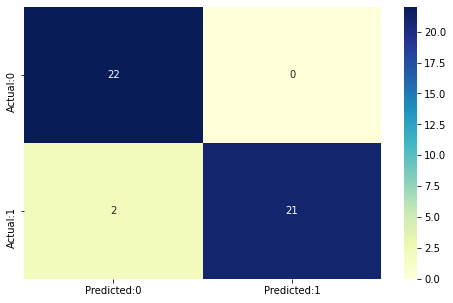

In [55]:
# compute the confusion matrix
cm = confusion_matrix(y_test, logreg_with_SGD_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [56]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [57]:
# accuracy measures by classification_report()
result = classification_report(y_test,logreg_with_SGD_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.91      0.95        23

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



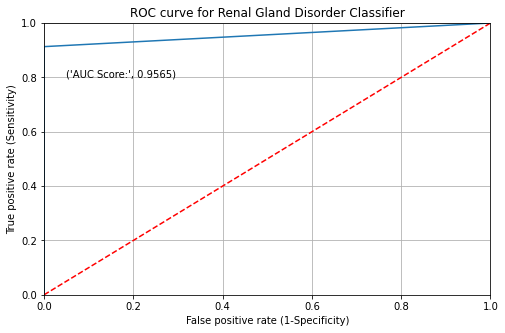

In [58]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, logreg_with_SGD_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, logreg_with_SGD_pred),4)))

# name the plot, and both axes
plt.title('ROC curve for Renal Gland Disorder Classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [59]:
Logistic_regression_SGD_metrics = pd.Series({'Model': "Logistic regression (SGD) ",
                     'AUC Score' : metrics.roc_auc_score(y_test, logreg_with_SGD_pred),
                 'Precision Score': metrics.precision_score(y_test, logreg_with_SGD_pred),
                 'Recall Score': metrics.recall_score(y_test, logreg_with_SGD_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, logreg_with_SGD_pred),
                
                 'f1-score':metrics.f1_score(y_test, logreg_with_SGD_pred)})

# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_SGD_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression (ScaledFeatures),0.888340,0.875,0.913043,0.888889,0.893617
1,Logistic regression (Without ScaledFeatures),0.888340,0.875,0.913043,0.888889,0.893617
2,Logistic regression (SGD),0.956522,1.000,0.913043,0.955556,0.954545


<a id='DecisionTree'> </a>
## 6. Decision Tree

<a id='DecisionTreeWFS'> </a>
### 6.1 Decision Tree 

In [60]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='entropy')

# train model
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [61]:
# plot the decision tree
lables = X_train.columns

dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                         feature_names= lables,  
                         class_names=["0","1"])  

# plot the decision tree
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())



NameError: name 'pydotplus' is not defined

In [62]:
# predict the model using 'X_test'
decision_tree_pred = decision_tree.predict(X_test)

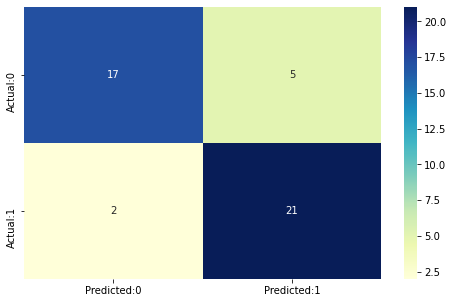

In [63]:
cm = confusion_matrix(y_test, decision_tree_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [64]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [65]:
# accuracy measures by classification_report()
result = classification_report(y_test, decision_tree_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.81      0.91      0.86        23

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45



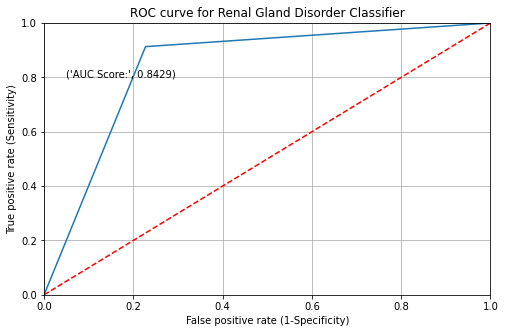

In [66]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, decision_tree_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, decision_tree_pred),4)))


# name the plot, and both axes
plt.title('ROC curve for Renal Gland Disorder Classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [67]:
Decision_tree_metrics = pd.Series({'Model': "Decision Tree ",
                     'AUC Score' : metrics.roc_auc_score(y_test, decision_tree_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_pred),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_pred),
                 
                  'f1-score':metrics.f1_score(y_test, decision_tree_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_tree_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression (ScaledFeatures),0.888340,0.875000,0.913043,0.888889,0.893617
1,Logistic regression (Without ScaledFeatures),0.888340,0.875000,0.913043,0.888889,0.893617
2,Logistic regression (SGD),0.956522,1.000000,0.913043,0.955556,0.954545
3,Decision Tree,0.842885,0.807692,0.913043,0.844444,0.857143


<a id='DecisionTreePruning'></a>
### 6.2 Prune the Decision Tree 

In [68]:
pruned = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# train the classifier
decision_tree_prune = pruned.fit(X_train,y_train)

In [69]:
lables = X_train.columns

dot_data = tree.export_graphviz(decision_tree_prune, out_file=None, 
                         feature_names= lables,  
                         class_names=["0","1"])  

# plot the decision tree
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [70]:
decision_tree_prune_pred = decision_tree_prune.predict(X_test)

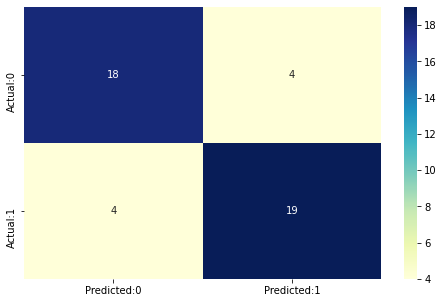

In [71]:
cm = confusion_matrix(y_test, decision_tree_prune_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [72]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [73]:
result = classification_report(y_test,decision_tree_prune_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.83      0.83      0.83        23

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45



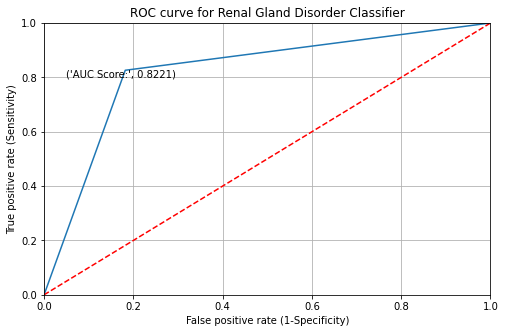

In [74]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, decision_tree_prune_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, decision_tree_prune_pred),4)))


# name the plot, and both axes
plt.title('ROC curve for Renal Gland Disorder Classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [75]:
Pruned_Decision_tree_metrics = pd.Series({'Model': "Pruned Decision Tree ",
                     'AUC Score' : metrics.roc_auc_score(y_test, decision_tree_prune_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_prune_pred),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_prune_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_prune_pred),
               
                  'f1-score':metrics.f1_score(y_test, decision_tree_prune_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Pruned_Decision_tree_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression (ScaledFeatures),0.888340,0.875000,0.913043,0.888889,0.893617
1,Logistic regression (Without ScaledFeatures),0.888340,0.875000,0.913043,0.888889,0.893617
2,Logistic regression (SGD),0.956522,1.000000,0.913043,0.955556,0.954545
3,Decision Tree,0.842885,0.807692,0.913043,0.844444,0.857143
4,Pruned Decision Tree,0.822134,0.826087,0.826087,0.822222,0.826087


<a id='DecisionTreewithGridSearchCv'> </a>
###  6.3 Decision Tree (using GridSearchCV)

In [76]:
# 'criterion': The function to measure the quality of split
# 'max_depth': The maximum depth of the tree
# 'max_leaf_nodes': The maximum number of leaf nodes required
# 'min_samples_leaf': The minimum number of samples required to be at a leaf node
# 'min_samples_split': The minimum number of samples required to split an internal node


# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [10, 20],
              "max_depth": [3, 5, 10, 20],
              "min_samples_leaf": [30, 100, 300],
              "max_leaf_nodes": [None,2,3,5],
              }

In [77]:
decision_tree_Gridsearch = DecisionTreeClassifier()
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid, cv=10)
decision_tree_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [78]:
decision_tree_Gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': None,
 'min_samples_leaf': 30,
 'min_samples_split': 10}

In [79]:
decision_tree_best_parameters = DecisionTreeClassifier(max_depth= decision_tree_Gridsearch.best_params_.get('max_depth'), 
                                                       min_samples_leaf= decision_tree_Gridsearch.best_params_.get('min_samples_leaf'), 
                                                       min_samples_split= decision_tree_Gridsearch.best_params_.get('min_samples_split'),
                                                       criterion=decision_tree_Gridsearch.best_params_.get('criterion')).fit(X_train, y_train)

In [80]:
lables = X_train.columns

dot_data = tree.export_graphviz(decision_tree_best_parameters, out_file=None, 
                         feature_names= lables,  
                         class_names=["0","1"])  

# plot the decision tree
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [81]:
decision_tree_best_parameters_pred = decision_tree_best_parameters.predict(X_test)

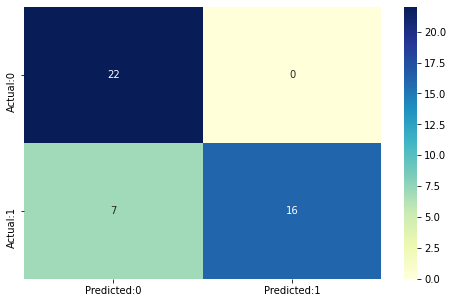

In [82]:
cm = confusion_matrix(y_test, decision_tree_best_parameters_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [83]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [84]:
result = classification_report(y_test,decision_tree_best_parameters_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        22
           1       1.00      0.70      0.82        23

    accuracy                           0.84        45
   macro avg       0.88      0.85      0.84        45
weighted avg       0.88      0.84      0.84        45



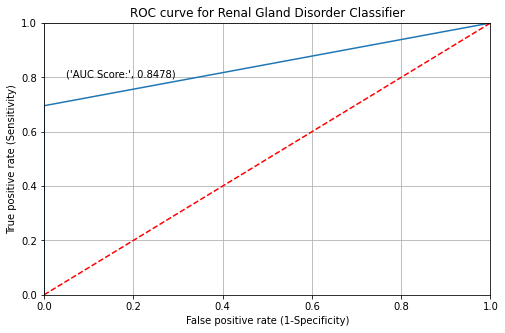

In [85]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, decision_tree_best_parameters_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, decision_tree_best_parameters_pred),4)))


# name the plot, and both axes
plt.title('ROC curve for Renal Gland Disorder Classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [86]:
Decision_tree_GridSearch_metrics = pd.Series({'Model': "Decision Tree (GridSearchCV) ",
                     'AUC Score' : metrics.roc_auc_score(y_test, decision_tree_best_parameters_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_best_parameters_pred),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_best_parameters_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_best_parameters_pred),
     
                 'f1-score':metrics.f1_score(y_test, decision_tree_best_parameters_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_tree_GridSearch_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression (ScaledFeatures),0.888340,0.875000,0.913043,0.888889,0.893617
1,Logistic regression (Without ScaledFeatures),0.888340,0.875000,0.913043,0.888889,0.893617
2,Logistic regression (SGD),0.956522,1.000000,0.913043,0.955556,0.954545
3,Decision Tree,0.842885,0.807692,0.913043,0.844444,0.857143
4,Pruned Decision Tree,0.822134,0.826087,0.826087,0.822222,0.826087
5,Decision Tree (GridSearchCV),0.847826,1.000000,0.695652,0.844444,0.820513


<a id="SVM"> </a>
## 7. Support Vector Machine (using GridSearchCV and Regularization)

In [87]:
param_grid_svm = {'kernel': ['linear', 'rbf', 'poly'], 'C' : [0.001, 0.01, 0.1, 1, 100]}

In [88]:
svm_Gridsearch = SVC()

# use GridSearchCV to find best parameter
svm_Gridsearch = GridSearchCV(svm_Gridsearch, param_grid_svm, cv=10)

# fit the model
svm_Gridsearch.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [89]:
svm_Gridsearch.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [90]:
svm_best_parameters = SVC(kernel= svm_Gridsearch.best_params_.get('kernel'), C = svm_Gridsearch.best_params_.get('C') )

# fit the model
svm_best_parameters.fit(X_train_scaled, y_train)

# get accuracy 
#Note: In case of classification algorithms score method represents accuracy.
svm_best_parameters.score(X_test_scaled,y_test)

0.9333333333333333

In [91]:
y_pred_svm_GridSearch = svm_best_parameters.predict(X_test_scaled)

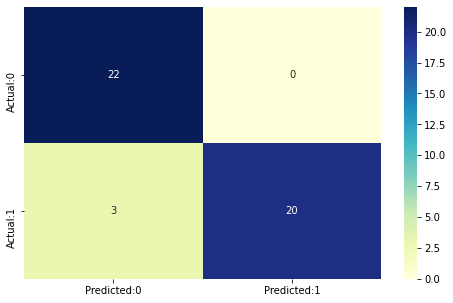

In [92]:
cm = confusion_matrix(y_test, y_pred_svm_GridSearch)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [93]:
result = classification_report(y_test,y_pred_svm_GridSearch)

print(result)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.87      0.93        23

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



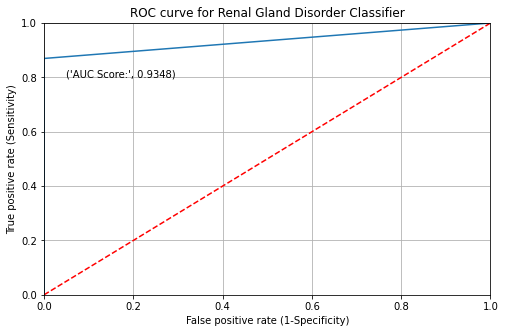

In [94]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_GridSearch)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_svm_GridSearch),4)))


# name the plot, and both axes
plt.title('ROC curve for Renal Gland Disorder Classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [95]:
svm_GridSearch_metrics = pd.Series({'Model': "SVM (GridSearchCV) ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_svm_GridSearch),
                 'Precision Score': metrics.precision_score(y_test, y_pred_svm_GridSearch),
                 'Recall Score': metrics.recall_score(y_test, y_pred_svm_GridSearch),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_svm_GridSearch),
                 
                 'f1-score': metrics.f1_score(y_test, y_pred_svm_GridSearch)})



# appending our result table
result_tabulation = result_tabulation.append(svm_GridSearch_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression (ScaledFeatures),0.888340,0.875000,0.913043,0.888889,0.893617
1,Logistic regression (Without ScaledFeatures),0.888340,0.875000,0.913043,0.888889,0.893617
2,Logistic regression (SGD),0.956522,1.000000,0.913043,0.955556,0.954545
3,Decision Tree,0.842885,0.807692,0.913043,0.844444,0.857143
4,Pruned Decision Tree,0.822134,0.826087,0.826087,0.822222,0.826087
5,Decision Tree (GridSearchCV),0.847826,1.000000,0.695652,0.844444,0.820513
6,SVM (GridSearchCV),0.934783,1.000000,0.869565,0.933333,0.930233


In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
clf=RandomForestClassifier(n_estimators=5)
#Train the model using the training sets y_pred=clf.predict(X_test)
ran=clf.fit(X_train,y_train)

#predict the model
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


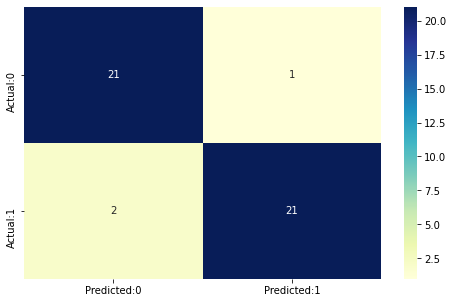

In [98]:
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [99]:
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

In [100]:
result = classification_report(y_test, y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.95      0.91      0.93        23

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



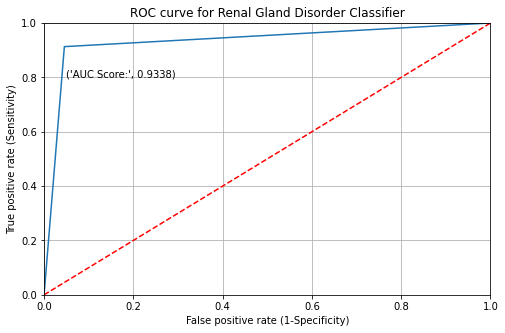

In [101]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))


# name the plot, and both axes
plt.title('ROC curve for Renal Gland Disorder Classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [102]:
ran_metrics = pd.Series({'Model': "RandomForest ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),

                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(ran_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression (ScaledFeatures),0.888340,0.875000,0.913043,0.888889,0.893617
1,Logistic regression (Without ScaledFeatures),0.888340,0.875000,0.913043,0.888889,0.893617
2,Logistic regression (SGD),0.956522,1.000000,0.913043,0.955556,0.954545
3,Decision Tree,0.842885,0.807692,0.913043,0.844444,0.857143
4,Pruned Decision Tree,0.822134,0.826087,0.826087,0.822222,0.826087
5,Decision Tree (GridSearchCV),0.847826,1.000000,0.695652,0.844444,0.820513
6,SVM (GridSearchCV),0.934783,1.000000,0.869565,0.933333,0.930233
7,RandomForest,0.933794,0.954545,0.913043,0.933333,0.933333


In [103]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(ran.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.03426914129398122'],
       ['Age', '0.05951484177399731'],
       ['EDUC', '0.036072999158757814'],
       ['MMSE', '0.09632907677376601'],
       ['eTIV', '0.03736457078635649'],
       ['nWBV', '0.08655088478106635'],
       ['ASF', '0.11655129255344736'],
       ['SES_2.0', '0.011139024040212737'],
       ['SES_3.0', '0.010884181272590875'],
       ['SES_4.0', '0.004889153322813455'],
       ['SES_5.0', '0.00509090909090909'],
       ['CDR_0.5', '0.42158898926463273'],
       ['CDR_1.0', '0.0797549358874686']], dtype='<U20')

In [104]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [105]:
model=XGBClassifier(random_state=10, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

[11:43:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Final prediction score: [0.91111111]


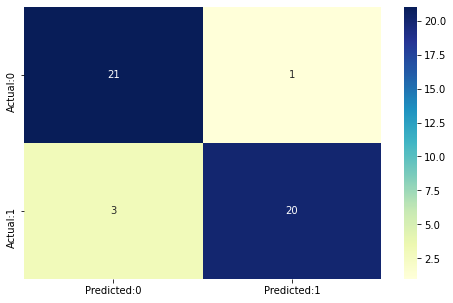

In [106]:
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [107]:
result = classification_report(y_test, y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.95      0.87      0.91        23

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



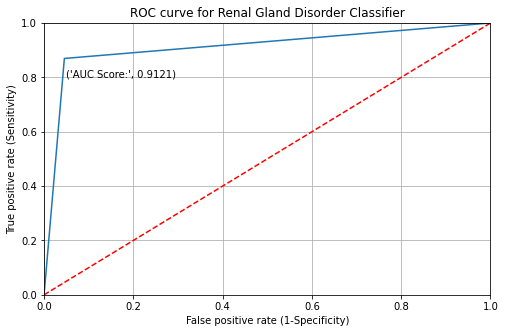

In [108]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))


# name the plot, and both axes
plt.title('ROC curve for Renal Gland Disorder Classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [109]:
Xgb = pd.Series({'Model': "XGBClassifier ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
            
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Xgb , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic regression (ScaledFeatures),0.888340,0.875000,0.913043,0.888889,0.893617
1,Logistic regression (Without ScaledFeatures),0.888340,0.875000,0.913043,0.888889,0.893617
2,Logistic regression (SGD),0.956522,1.000000,0.913043,0.955556,0.954545
3,Decision Tree,0.842885,0.807692,0.913043,0.844444,0.857143
4,Pruned Decision Tree,0.822134,0.826087,0.826087,0.822222,0.826087
5,Decision Tree (GridSearchCV),0.847826,1.000000,0.695652,0.844444,0.820513
6,SVM (GridSearchCV),0.934783,1.000000,0.869565,0.933333,0.930233
7,RandomForest,0.933794,0.954545,0.913043,0.933333,0.933333
8,XGBClassifier,0.912055,0.952381,0.869565,0.911111,0.909091


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (9).

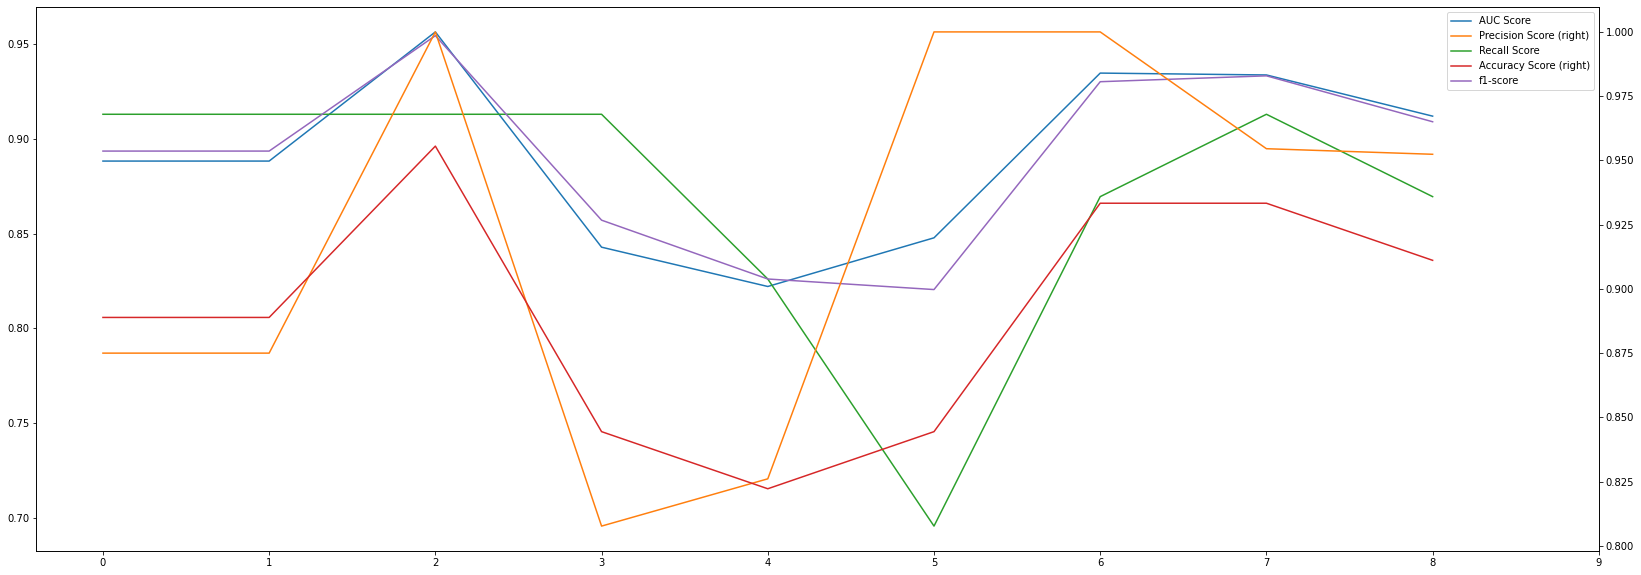

In [110]:
plt.rcParams['figure.figsize']=(28,10)

result_tabulation.plot(secondary_y=['Accuracy Score','Precision Score'], mark_right=True)

plt.xticks([0,1,2,3,4,5,6,7,8,9], list(result_tabulation.Model))
plt.show()

<a id="conclusion"> </a>
## 9. Conclusion and Interpretation